In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
test.columns[test.nunique()<2]

Index([], dtype='object')

In [4]:
print ("Train set-> Rows and Columns: ", train.shape)
print ("Test set-> Rows and Columns: ", test.shape)

Train set-> Rows and Columns:  (9557, 143)
Test set-> Rows and Columns:  (23856, 142)


In [5]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [6]:
train.isnull().sum().sort_values(ascending=False).head()

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

In [7]:
test.isnull().sum().sort_values(ascending=False).head()

rez_esc      19653
v18q1        18126
v2a1         17403
SQBmeaned       31
meaneduc        31
dtype: int64

In [8]:
df=train.select_dtypes(np.int64).nunique()
df

hacdor             2
rooms             11
hacapo             2
v14a               2
refrig             2
                  ..
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      10
agesq             97
Target             4
Length: 130, dtype: int64

In [9]:
df.value_counts()

2     101
13      5
97      3
22      3
11      3
10      3
9       3
7       3
6       2
4       2
14      1
1       1
dtype: int64

In [10]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [11]:
mapp = {"yes": 1, "no": 0}
for d in [train, test]:    
    d['dependency'] = d['dependency'].replace(mapp).astype(np.float64)
    d['edjefa'] = d['edjefa'].replace(mapp).astype(np.float64)
    d['edjefe'] = d['edjefe'].replace(mapp).astype(np.float64)

In [12]:
train.select_dtypes('object').head()

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f


In [13]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
train[train['idhogar'] == not_equal.index[0]][['Target']]

,Target
7651,3
7652,2
7653,3
7654,3
7655,2


In [14]:
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

In [15]:
missing_col = data.columns[data.isnull().sum()>0].values
missing_col=missing_col[:-1]
missing_col

array(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16b550eb50>,
      dtype=object)

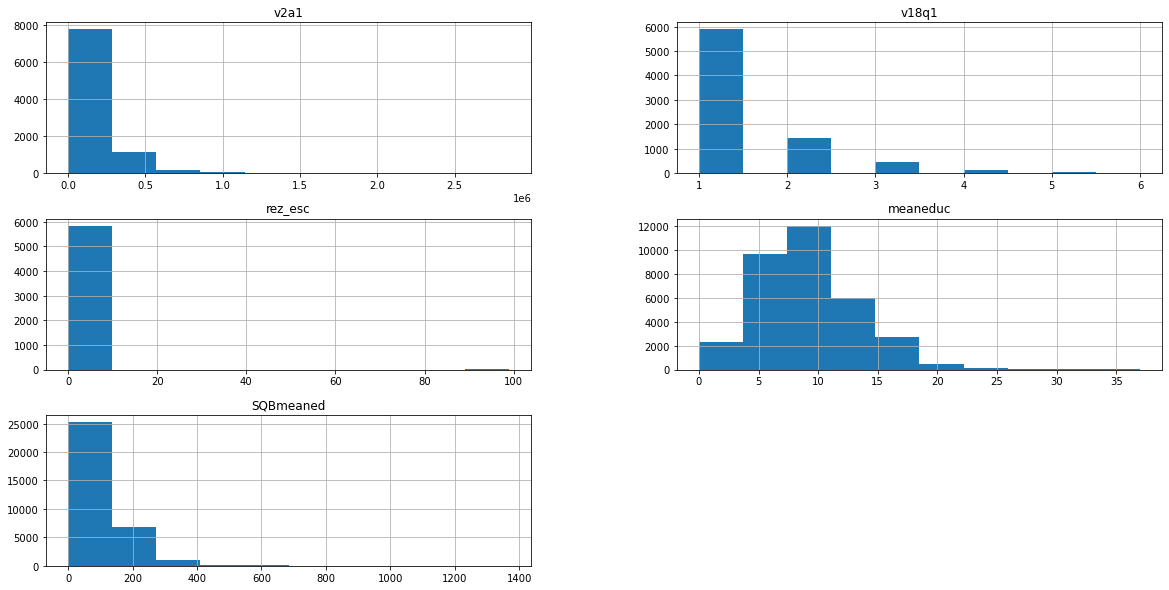

In [16]:
data[missing_col].hist(figsize=(20,10))

In [17]:
data['v18q1'] = data['v18q1'].fillna(0)
data['v2a1'] = data['v2a1'].fillna(0)


In [18]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5
data['rez_esc']=data['rez_esc'].fillna(0)

In [19]:
data['SQBmeaned']=data['SQBmeaned'].fillna(data['SQBmeaned'].mean())
data['meaneduc']=data['meaneduc'].fillna(data['meaneduc'].mean())

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier as xgb

In [21]:
train_labels = np.array(list(data[data['Target'].notnull()]['Target'].astype(np.uint8)))

train_set = data[data['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = data[data['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])




In [22]:
features = [c for c in train_set.columns]
len(features)

140

In [23]:
test_set.isnull().sum().sort_values(ascending=False).head()

agesq          0
abastaguano    0
sanitario2     0
sanitario1     0
coopele        0
dtype: int64

In [24]:

model=xgb()
X_train, X_valid, y_train, y_valid = train_test_split(train_set[features], train_labels, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print('Macro f1 score is {} using model {}'.format(macro_f1, model))

Macro f1 score is 0.8773495572681598 using model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [25]:
#print(type(train['Target'].values),type(train['Target']))

In [26]:
#target=train['Target'].values
#target_index = {1:0, 2:1, 3:2, 4:3}
#target = np.array([target_index[c] for c in target])

In [27]:
#features = [c for c in train.columns if c not in ['Id', 'Target']]
#len(features)

In [28]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#import lightgbm as lgb
#def label_encoding(col):
#    le = LabelEncoder()
#    le.fit(list(train[col].values) + list(test[col].values))
#    train[col] = le.transform(train[col].astype(str))
#    test[col] = le.transform(test[col].astype(str))

#num_cols = train._get_numeric_data().columns
#cat_cols = list(set(features) - set(num_cols))
#for col in cat_cols:
#    label_encoding(col)

In [29]:
#X_train, X_valid, y_train, y_valid = train_test_split(train[features].values, target, test_size=0.2, random_state=1)
#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_valid = lgb.Dataset(X_valid, y_valid)

In [30]:
#params = {'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss',
 #         'num_class': 4, 'max_depth': 44, 'num_leaves': 36, 'learning_rate': 0.01,
  #        'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 5,
   #       'lambda_l2': 1.0, 'verbose': -1, 'num_threads': -1 }

#model = lgb.train(params, lgb_train, num_boost_round=100,  valid_sets=[lgb_train, lgb_valid], 
 #                 early_stopping_rounds=20000, verbose_eval=1000)

In [31]:
preds = model.predict(test_set[features])

In [32]:
len(preds)

23856

In [33]:
#reverse_index = {}
#for k,v in target_index.items():
 #   reverse_index[v] = k

In [34]:
#reverse_index

In [35]:
#pred=[]
#for p in preds:
#    pred.append(reverse_index[np.argmax(p)])
#len(pred)

In [36]:
subm = pd.DataFrame()
subm['Id'] = test['Id']
subm['Target'] = preds
subm.to_csv('submission.csv', index=False)

In [37]:
subm['Target'].value_counts()

4    17699
2     3416
3     1720
1     1021
Name: Target, dtype: int64